In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ODE Function 1
def ode1(t, y,dy):
    return -y + 2*t

Order of the above ODE is 1st order

In [3]:
# ODE Function 2
def ode2(t, y, dy):
    return -4*dy - 4*y

Order of the above ODE is 2nd order

#### Solving the above two ODEs using the Euler’s method and the second order Runge-Kutta method with a step size of 𝑑𝑡 = 0.001 for 10000 steps.

In [4]:

# exact solution for ODE1
def exact_solution1(t):
    return 2*t - 2 + 2*np.exp(-t)

# exact solution for ODE2
def exact_solution2(t):
    return (1 + 2*t) * np.exp(-2*t)

# Euler's method
def euler_method(ode, t0, y0, dy0, h, num_steps):
    t = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)

    t[0] = t0
    y[0] = y0

    for i in range(num_steps):
        t[i+1] = t[i] + h
        y[i+1] = y[i] + h * ode(t[i], y[i], dy0)

    return t, y

# Second-order rk method
def rk_method(ode, t0, y0, dy0, h, num_steps):
    t = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)

    t[0] = t0
    y[0] = y0

    for i in range(num_steps):
        t[i+1] = t[i] + h
        k1 = h * ode(t[i], y[i], dy0)
        k2 = h * ode(t[i] + h/2, y[i] + k1/2, dy0)
        y[i+1] = y[i] + k2

    return t, y

# the initial conditions 
t0 = 0
y0_ode1 = 0
y0_ode2 = 1
dy0_ode2 = 0

# step size
h = 0.001
num_steps = 10000

# Solve the ODEs using Euler's method
te1, ye1 = euler_method(ode1, t0, y0_ode1, dy0_ode2, h, num_steps)
te2, ye2 = euler_method(ode2, t0, y0_ode2, dy0_ode2, h, num_steps)

# Solve the ODEs using the second-order rk method
trk1, yrk1 = rk_method(ode1, t0, y0_ode1, dy0_ode2, h, num_steps)
trk2, yrk2 = rk_method(ode2, t0, y0_ode2, dy0_ode2, h, num_steps)

# Calculate the exact solutions
t_exact = np.linspace(t0, t0 + num_steps*h, num_steps+1)
y_exact1 = exact_solution1(t_exact)
y_exact2 = exact_solution2(t_exact)




#### Ploting the expected solu(on along with the calculated solutions obtained from Euler's method and the second-order Runge-KuLa method, using a step size of dt = 0.01 for 10,000 steps.

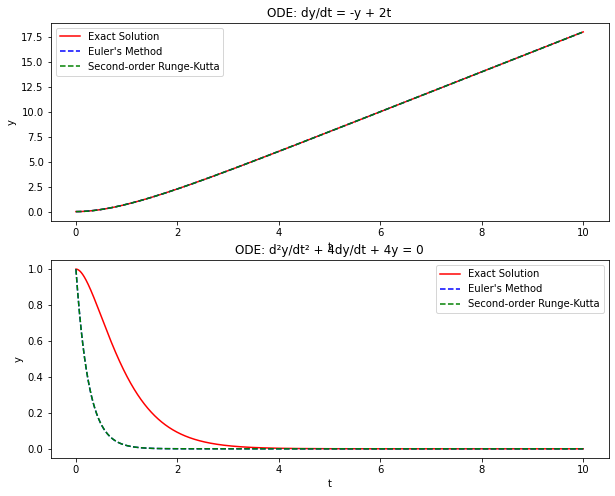

In [5]:
# Plot the results
plt.figure(figsize=(10, 8))

# PLOT ODE 1
plt.subplot(2, 1, 1)
plt.plot(t_exact, y_exact1, 'r-', label='Exact Solution')
plt.plot(te1, ye1, 'b--', label="Euler's Method")
plt.plot(trk1, yrk1, 'g--', label="Second-order Runge-Kutta")
plt.xlabel('t')
plt.ylabel('y')
plt.title("ODE: dy/dt = -y + 2t")
plt.legend()

# PLOT ODE 2
plt.subplot(2, 1, 2)
plt.plot(t_exact, y_exact2, 'r-', label='Exact Solution')
plt.plot(te2, ye2, 'b--', label="Euler's Method")
plt.plot(trk2, yrk2, 'g--', label="Second-order Runge-Kutta")
plt.xlabel('t')
plt.ylabel('y')
plt.title("ODE: d²y/dt² + 4dy/dt + 4y = 0")
plt.legend()

plt.show()